Notebook to generate some of the figures and information used in the article

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# colorblind friendly color palet
color_dictionary = {
    "Observed": "#7b85d4",
    "LSTM": "#e9d043",
    "LSTM+SHM": "#83c995",
    "LSTM+Bucket": "#859795",
    "LSTM+NonSense": "#ad5b50",
    "SHM": "#f37738"}

Part 1. NSE Comparison

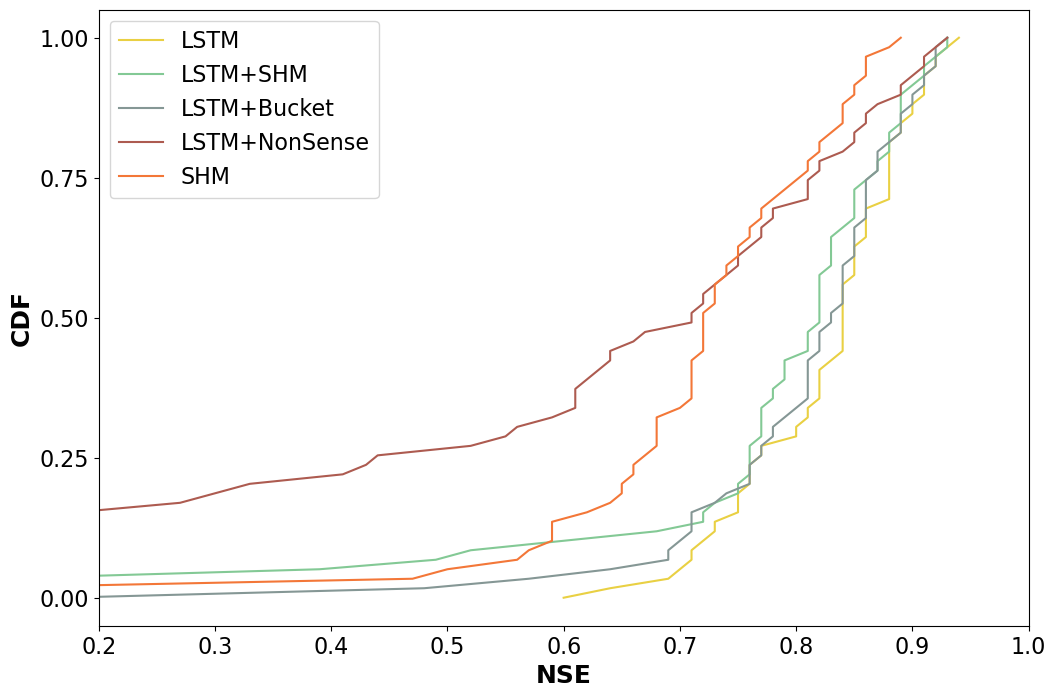

In [4]:
# The NSE files are generated when running the scripts associated with each model
NSE_SHM = pd.read_csv('models/SHM/NSE_SHM.txt', index_col=0)
NSE_LSTM = pd.read_csv('models/LSTM/NSE_LSTM.txt', index_col=0)
NSE_LSTM_SHM = pd.read_csv('models/LSTM_SHM/NSE_LSTM_SHM.txt', index_col=0)
NSE_LSTM_Bucket = pd.read_csv('models/LSTM_Bucket/NSE_LSTM_Bucket.txt', index_col=0)
NSE_LSTM_NonSense = pd.read_csv('models/LSTM_NonSense/NSE_LSTM_NonSense.txt', index_col=0)
# Concatenate the information in one dataframe
NSE_Comparison = pd.concat([NSE_SHM,NSE_LSTM,NSE_LSTM_SHM,NSE_LSTM_Bucket,NSE_LSTM_NonSense], axis=1)

# Sort the values of each column in ascending order
df_graph = NSE_Comparison.apply(lambda x: x.sort_values().values)
# Create the empirical cdf of the NSE values
cdf = p = np.arange(len(NSE_Comparison)) / (len(NSE_Comparison) - 1)

#Create plot
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(df_graph['NSE_LSTM'], cdf, label='LSTM' , color=color_dictionary['LSTM'])
plt.plot(df_graph['NSE_LSTM_SHM'], cdf, label='LSTM+SHM' , color=color_dictionary['LSTM+SHM'])
plt.plot(df_graph['NSE_LSTM_Bucket'], cdf, label='LSTM+Bucket' , color=color_dictionary['LSTM+Bucket'])
plt.plot(df_graph['NSE_LSTM_NonSense'], cdf, label='LSTM+NonSense' , color=color_dictionary['LSTM+NonSense'])
plt.plot(df_graph['NSE_SHM'], cdf, label='SHM' , color=color_dictionary['SHM'])

plt.xlim(0.2, 1)
plt.xlabel('NSE', fontsize=18, fontweight='bold')
plt.ylabel('CDF', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)    
plt.yticks([i * 0.25 for i in range(5)], fontsize=16)

plt.legend(loc='upper left', fontsize=16)
#plt.savefig('Performance_Comparison.png', bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()

Part 2. Discharge comparison

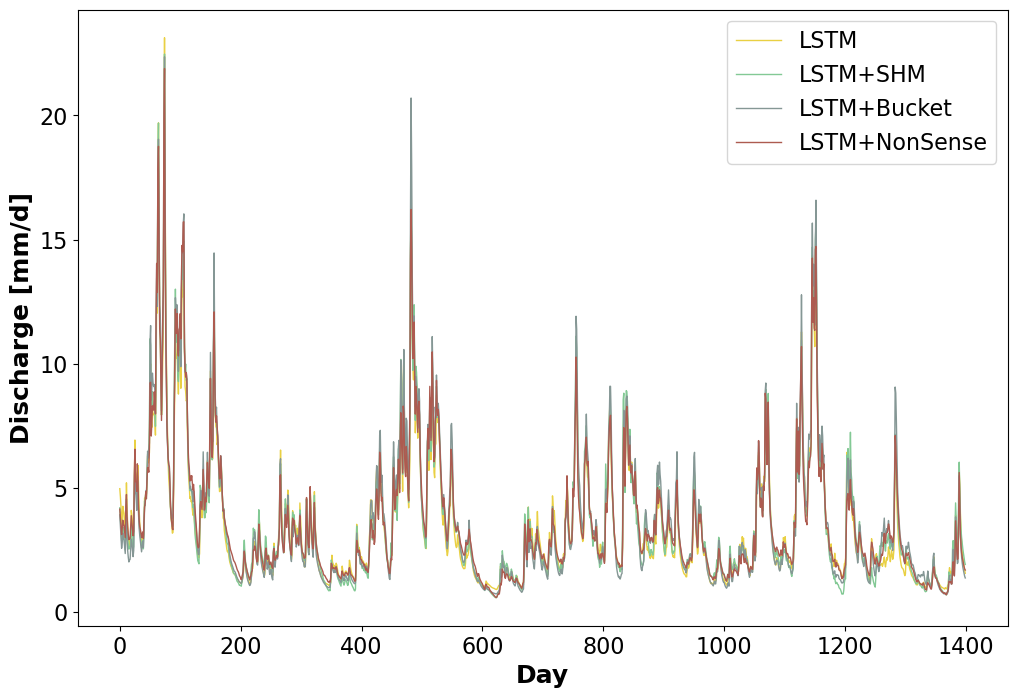

In [10]:
# The discharge files are generated when running the scripts associated with each model
basin_of_interest = 15006

LSTM = pd.read_csv('models/LSTM/LSTM_discharge.csv')
LSTM_SHM = pd.read_csv('models/LSTM_SHM/LSTM_SHM_discharge.csv')
LSTM_Bucket = pd.read_csv('models/LSTM_Bucket/LSTM_Bucket_discharge.csv')
LSTM_NonSense = pd.read_csv('models/LSTM_NonSense/LSTM_NonSense_discharge.csv')

plt.rcParams["figure.figsize"]=(12,8)
plt.plot(LSTM[str(basin_of_interest)][0:1400].values, label='LSTM' , color=color_dictionary['LSTM'], linewidth=1)
plt.plot(LSTM_SHM[str(basin_of_interest)][0:1400].values, label='LSTM+SHM' , color=color_dictionary['LSTM+SHM'], linewidth=1)
plt.plot(LSTM_Bucket[str(basin_of_interest)][0:1400].values, label='LSTM+Bucket' , color=color_dictionary['LSTM+Bucket'], linewidth=1)
plt.plot(LSTM_NonSense[str(basin_of_interest)][0:1400].values, label='LSTM+NonSense' , color=color_dictionary['LSTM+NonSense'], linewidth=1)
plt.xlabel('Day', fontsize=18, fontweight='bold')
plt.ylabel('Discharge [mm/d]', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
plt.legend(loc="upper right",fontsize=16)
#plt.savefig('Discharge_Comparison', bbox_inches='tight', pad_inches=0.05, dpi=300)

Part 3. Soil Moisture comparison (ERA5-LAND vs models)

In [12]:
#measured data
df_swvl3 = pd.read_csv('soil_moisture/Era5_swvl3.csv')
df_swvl3.set_index('time', inplace=True)
df_swvl3_minmax = (df_swvl3 - df_swvl3.min()) / (df_swvl3.max()-df_swvl3.min())

# LSTM+SHM soil moisture data
df_LSTM_SHM_sm = pd.read_csv('models/LSTM_SHM/LSTM_SHM_sm.csv')
df_LSTM_SHM_sm.set_index('time', inplace=True)
df_LSTM_SHM_sm.index = df_swvl3.index
df_LSTM_SHM_sm_minmax = (df_LSTM_SHM_sm- df_LSTM_SHM_sm.min()) / (df_LSTM_SHM_sm.max()-df_LSTM_SHM_sm.min())

# LSTM+Bucket soil moisture data
df_LSTM_Bucket_sm = pd.read_csv('models/LSTM_Bucket/LSTM_Bucket_sm.csv')
df_LSTM_Bucket_sm.set_index('time', inplace=True)
df_LSTM_Bucket_sm.index = df_swvl3.index
df_LSTM_Bucket_sm_minmax = (df_LSTM_Bucket_sm - df_LSTM_Bucket_sm.min()) / (df_LSTM_Bucket_sm.max()-df_LSTM_Bucket_sm.min())

# Read LSTM+NonSense soil moisture data
df_LSTM_NonSense_sm = pd.read_csv('models/LSTM_NonSense/LSTM_NonSense_sm.csv')
df_LSTM_NonSense_sm.set_index('time', inplace=True)
df_LSTM_NonSense_sm.index = df_swvl3.index
df_LSTM_NonSense_sm_minmax = (df_LSTM_NonSense_sm- df_LSTM_NonSense_sm.min()) / (df_LSTM_NonSense_sm.max()-df_LSTM_NonSense_sm.min())

# Read SHM soil moisture data
df_SHM_sm = pd.read_csv('models/SHM/SHM_sm.csv')
df_SHM_sm.set_index('time', inplace=True)
df_SHM_sm.index = df_swvl3.index
df_SHM_sm_minmax = (df_SHM_sm- df_SHM_sm.min()) / (df_SHM_sm.max()-df_SHM_sm.min())

correlation_1 = df_swvl3_minmax.corrwith(df_LSTM_SHM_sm_minmax)
print(f'Correlation swvl3 data with LSTM+SHM model \n median: {"%.2f" % correlation_1.median()} | mix: {"%.2f" % correlation_1.min()} | max: {"%.2f" % correlation_1.max()}')

correlation_2 = df_swvl3_minmax.corrwith(df_LSTM_Bucket_sm_minmax)
print(f'Correlation swvl3 data with LSTM+Bucket model \n median: {"%.2f" % correlation_2.median()} | mix: {"%.2f" % correlation_2.min()} | max: {"%.2f" % correlation_2.max()}')

correlation_3 = df_swvl3_minmax.corrwith(df_LSTM_NonSense_sm_minmax)
print(f'Correlation swvl3 data with LSTM+NonSense model \n median: {"%.2f" % correlation_3.median()} | mix: {"%.2f" % correlation_3.min()} | max: {"%.2f" % correlation_3.max()}')

correlation_4 = df_swvl3_minmax.corrwith(df_SHM_sm_minmax)
print(f'Correlation swvl3 data with SHM model \n median: {"%.2f" % correlation_4.median()} | mix: {"%.2f" % correlation_4.min()} | max: {"%.2f" % correlation_4.max()}')

Correlation swvl3 data with LSTM+SHM model 
 median: 0.83 | mix: 0.30 | max: 0.93
Correlation swvl3 data with LSTM+Bucket model 
 median: 0.74 | mix: 0.14 | max: 0.92
Correlation swvl3 data with LSTM+NonSense model 
 median: 0.59 | mix: 0.08 | max: 0.89
Correlation swvl3 data with SHM model 
 median: 0.86 | mix: 0.41 | max: 0.94


Part 4. Soil Moisture comparison (SHM vs LSTM+SHM)

In [14]:
# Read SHM interflow data
df_SHM_si = pd.read_csv('models/SHM/SHM_si.csv')
df_SHM_si.set_index('time', inplace=True)
df_SHM_si.index = df_swvl3.index
df_SHM_si_minmax = (df_SHM_si- df_SHM_si.min()) / (df_SHM_si.max()-df_SHM_si.min())

# Read LSTM+SHM interflow data
df_LSTM_SHM_si = pd.read_csv('models/LSTM_SHM/LSTM_SHM_si.csv')
df_LSTM_SHM_si.set_index('time', inplace=True)
df_LSTM_SHM_si.index = df_swvl3.index
df_LSTM_SHM_si_minmax = (df_LSTM_SHM_si  - df_LSTM_SHM_si .min()) / (df_LSTM_SHM_si .max()-df_LSTM_SHM_si .min())

correlation_5 = df_SHM_sm_minmax.corrwith(df_LSTM_SHM_sm_minmax)
print(f'Correlation between SHM and LSTM+SHM in unsaturated zone storage \n median: {"%.2f" % correlation_5.median()} | mix: {"%.2f" % correlation_5.min()} | max: {"%.2f" % correlation_5.max()}')

correlation_6 = df_SHM_si_minmax.corrwith(df_LSTM_SHM_si_minmax)
print(f'Correlation between SHM and LSTM+SHM in interflow storage \n median: {"%.2f" % correlation_6.median()} | mix: {"%.2f" % correlation_6.min()} | max: {"%.2f" % correlation_6.max()}')

Correlation between SHM and LSTM+SHM in unsaturated zone storage 
 median: 0.96 | mix: 0.64 | max: 1.00
Correlation between SHM and LSTM+SHM in interflow storage 
 median: 0.74 | mix: 0.37 | max: 0.94


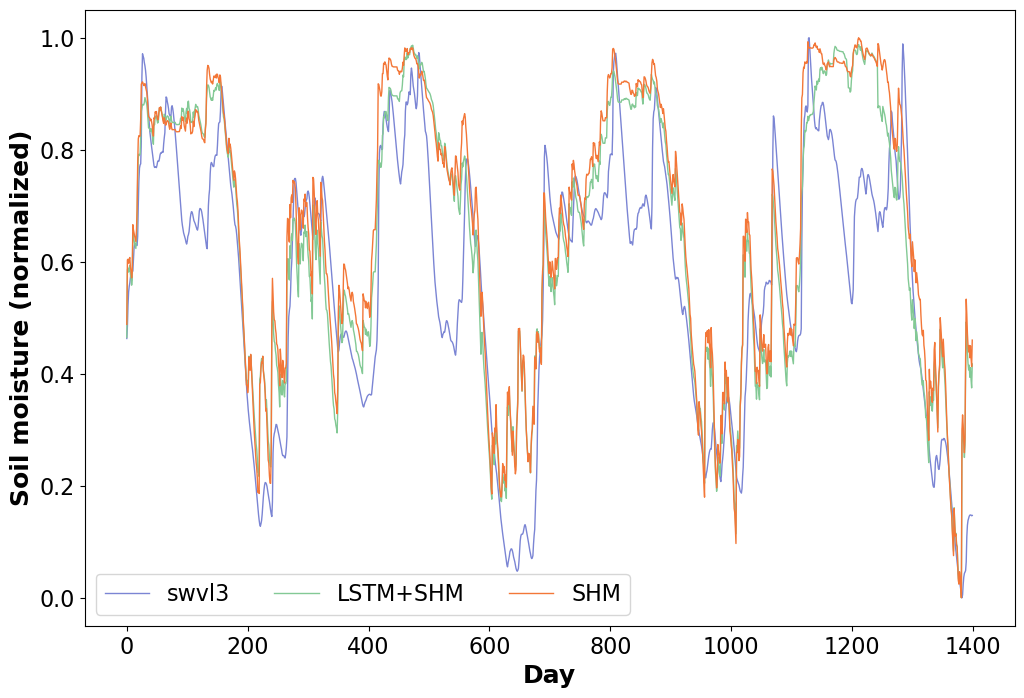

In [15]:
# Plot the specific column
column_to_plot = 11001 #id of basin

plt.rcParams["figure.figsize"]=(12,8)
plt.plot(df_swvl3_minmax[str(column_to_plot)][0:1400].values, label="swvl3", color=color_dictionary['Observed'], linewidth=1)
plt.plot(df_LSTM_SHM_sm_minmax[str(column_to_plot)][0:1400].values, label="LSTM+SHM", color=color_dictionary['LSTM+SHM'], linewidth=1)
plt.plot(df_SHM_sm_minmax[str(column_to_plot)][0:1400].values, label="SHM", color=color_dictionary['SHM'], linewidth=1)

plt.xlabel('Day', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)  
plt.ylabel('Soil moisture (normalized)', fontsize=18, fontweight='bold')
plt.yticks(fontsize=16)  

plt.legend(loc="lower left",fontsize=16, ncol=3)
#plt.savefig('soil_moisture/SM_Comparison.png', bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()